# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
name = []
lat = []
lon = []
temp = []
wind = []
hum = []
country = []
cloud = []
date = []
series = 0
for i in cities:
    try:
        series += 1
        response = requests.get(url + i).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloud.append(response['clouds']['all'])
        print(f"Pulling info on city {series}: {i}")
    except (KeyError, IndexError):
        print('Error, city not found! Skipping...')

Error, city not found! Skipping...
Pulling info on city 2: victoria
Pulling info on city 3: yellowknife
Pulling info on city 4: kelo
Pulling info on city 5: ous
Pulling info on city 6: ushuaia
Pulling info on city 7: pevek
Pulling info on city 8: kruisfontein
Pulling info on city 9: longyearbyen
Error, city not found! Skipping...
Pulling info on city 11: punta arenas
Pulling info on city 12: rikitea
Pulling info on city 13: norman wells
Pulling info on city 14: bredasdorp
Pulling info on city 15: burnie
Pulling info on city 16: ribeira grande
Pulling info on city 17: mataura
Error, city not found! Skipping...
Pulling info on city 19: tuktoyaktuk
Pulling info on city 20: bluff
Pulling info on city 21: rafai
Pulling info on city 22: butaritari
Pulling info on city 23: castro
Pulling info on city 24: poum
Pulling info on city 25: richards bay
Pulling info on city 26: jamestown
Pulling info on city 27: nyurba
Pulling info on city 28: guerrero negro
Pulling info on city 29: kulhudhuffushi
P

Pulling info on city 238: namibe
Pulling info on city 239: taoudenni
Error, city not found! Skipping...
Pulling info on city 241: vanavara
Pulling info on city 242: mount gambier
Pulling info on city 243: tarko-sale
Pulling info on city 244: marsa matruh
Pulling info on city 245: atar
Error, city not found! Skipping...
Pulling info on city 247: arosa
Error, city not found! Skipping...
Pulling info on city 249: nouadhibou
Error, city not found! Skipping...
Pulling info on city 251: karachi
Pulling info on city 252: samarai
Pulling info on city 253: hjelset
Error, city not found! Skipping...
Pulling info on city 255: fort nelson
Pulling info on city 256: pisa
Pulling info on city 257: bandarbeyla
Pulling info on city 258: omboue
Pulling info on city 259: padang
Pulling info on city 260: kenai
Error, city not found! Skipping...
Pulling info on city 262: lumby
Pulling info on city 263: krasnoselkup
Pulling info on city 264: husavik
Pulling info on city 265: sao felix do xingu
Error, city n

Pulling info on city 474: high level
Pulling info on city 475: broome
Pulling info on city 476: acapulco
Error, city not found! Skipping...
Pulling info on city 478: bilma
Pulling info on city 479: normal
Pulling info on city 480: miandrivazo
Pulling info on city 481: puerto narino
Pulling info on city 482: srednekolymsk
Pulling info on city 483: cayenne
Pulling info on city 484: humaita
Pulling info on city 485: kadaya
Pulling info on city 486: karasburg
Pulling info on city 487: ayan
Pulling info on city 488: pyaozerskiy
Error, city not found! Skipping...
Error, city not found! Skipping...
Pulling info on city 491: ribeira brava
Pulling info on city 492: palora
Pulling info on city 493: ascension
Pulling info on city 494: ust-ordynskiy
Pulling info on city 495: great yarmouth
Pulling info on city 496: santa isabel
Pulling info on city 497: artesia
Pulling info on city 498: sisophon
Pulling info on city 499: khipro
Pulling info on city 500: lisakovsk
Pulling info on city 501: tomatlan

In [5]:
print(len(cities))
print(len(name))

607
551


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
DF = pd.DataFrame({'City': name, 'Lat': lat, 'Lng': lon, 'Max Temp': temp, 'Humidity': hum, 'Cloudiness': cloud, 'Wind Speed': wind, 'Country': country, 'Date': date})
DF.to_csv("../output_data/cities.csv", index=False, header=True)
DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hong Kong,22.2855,114.1577,71.01,66,28,1.01,HK,1614679604
1,Yellowknife,62.4560,-114.3525,-9.00,70,90,8.05,CA,1614679697
2,Kelo,9.3086,15.8066,97.93,8,0,8.93,TD,1614679697
3,Ous,60.9058,61.5186,16.41,96,100,11.86,RU,1614679697
4,Ushuaia,-54.8000,-68.3000,42.80,81,0,3.44,AR,1614679697


In [10]:
DF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.046231,14.325456,53.331307,70.172414,49.061706,8.692595,1.614680e+09
std,33.174958,90.195472,31.308009,23.144315,39.442799,6.281514,6.968799e+01
min,-54.800000,-175.200000,-39.010000,4.000000,0.000000,0.220000,1.614679e+09
25%,-7.488350,-64.416650,35.305000,58.000000,2.000000,3.565000,1.614680e+09
50%,22.890900,17.981100,61.000000,76.000000,41.000000,7.160000,1.614680e+09
75%,47.804150,91.485050,77.700000,88.000000,90.000000,11.980000,1.614680e+09
max,78.218600,179.316700,102.200000,100.000000,100.000000,40.290000,1.614680e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
DF_lowerhum = DF[DF['Humidity'] <= 100]
DF_lowerhum.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hong Kong,22.2855,114.1577,71.01,66,28,1.01,HK,1614679604
1,Yellowknife,62.4560,-114.3525,-9.00,70,90,8.05,CA,1614679697
2,Kelo,9.3086,15.8066,97.93,8,0,8.93,TD,1614679697
3,Ous,60.9058,61.5186,16.41,96,100,11.86,RU,1614679697
4,Ushuaia,-54.8000,-68.3000,42.80,81,0,3.44,AR,1614679697


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

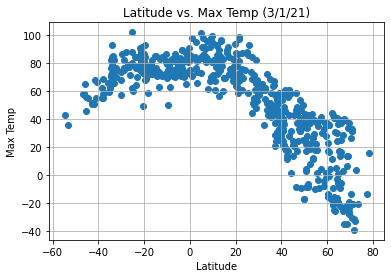

In [14]:
plt.scatter(DF['Lat'], DF['Max Temp'])
plt.title('Latitude vs. Max Temp (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

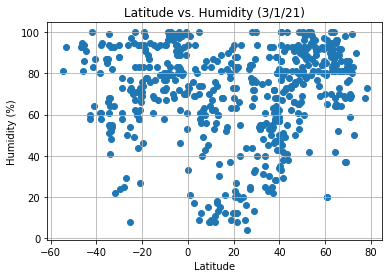

In [15]:
plt.scatter(DF['Lat'], DF['Humidity'])
plt.title('Latitude vs. Humidity (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

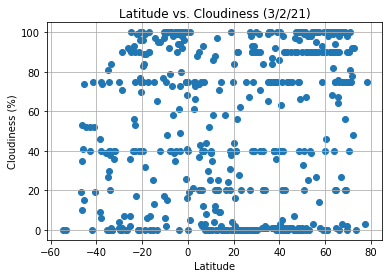

In [16]:
plt.scatter(DF['Lat'], DF['Cloudiness'])
plt.title('Latitude vs. Cloudiness (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

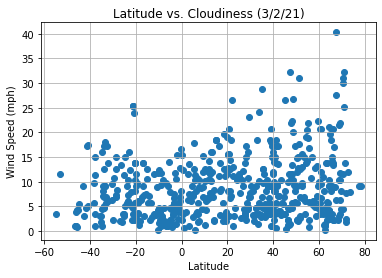

In [17]:
plt.scatter(DF['Lat'], DF['Wind Speed'])
plt.title('Latitude vs. Cloudiness (3/2/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [42]:
NorthDF = DF[DF['Lat'] > 0]
SouthDF = DF[DF['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.8517411454820758


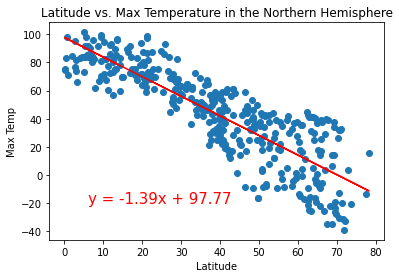

In [45]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Max Temp"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Max Temp'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Max Temp'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (6,-20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = 0.5309293502273925


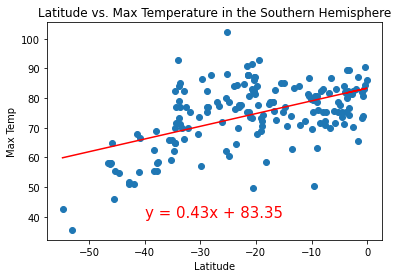

In [30]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Max Temp"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Max Temp'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Max Temp'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-40,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.40727472438968837


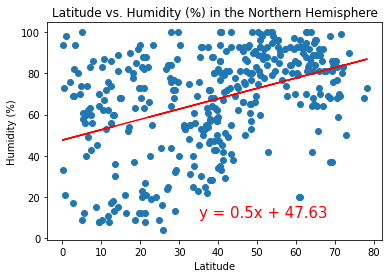

In [32]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Humidity"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Humidity'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Humidity'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (35,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.15998538418917183


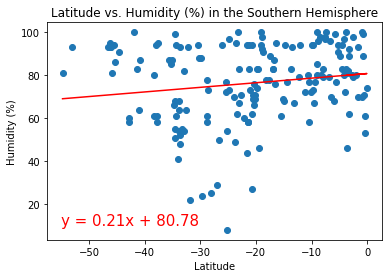

In [37]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Humidity"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Humidity'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Humidity'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.31088786302476024


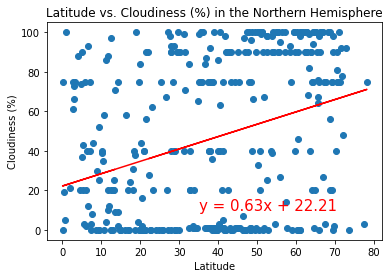

In [38]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Cloudiness"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Cloudiness'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Cloudiness'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (35,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.4374903167104728


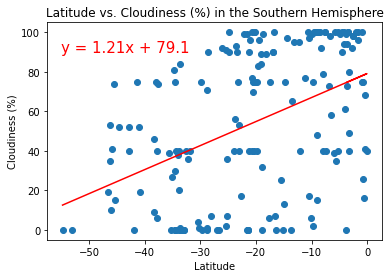

In [41]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Cloudiness"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Cloudiness'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Cloudiness'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-55,90), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) in the Southern Hemisphere')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.10808745774452341


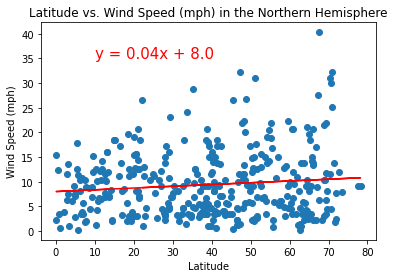

In [49]:
print(f'r = {st.pearsonr(NorthDF["Lat"], NorthDF["Wind Speed"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(NorthDF['Lat'], NorthDF['Wind Speed'])
regress = NorthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorthDF['Lat'], NorthDF['Wind Speed'])
plt.plot(NorthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (10,35), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = -0.09448892549715253


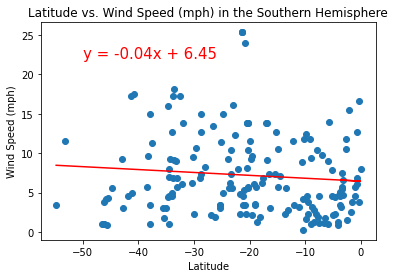

In [51]:
print(f'r = {st.pearsonr(SouthDF["Lat"], SouthDF["Wind Speed"])[0]}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(SouthDF['Lat'], SouthDF['Wind Speed'])
regress = SouthDF['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouthDF['Lat'], SouthDF['Wind Speed'])
plt.plot(SouthDF['Lat'], regress, "r-")
plt.annotate(line_eq, (-50,22), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) in the Southern Hemisphere')
plt.show()